In [1]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from sklearn.metrics import *
from tensorflow.keras.models import load_model

In [8]:
model1=load_model("C:\\Users\\Mehmet\\Desktop\\ANACONDA PROJELERİ\\modeller\\mobilenetv10.h5")

In [3]:
veri = ImageDataGenerator(rescale=1./255)
testuzantı=r"C:\Users\Mehmet\Desktop\aero-engine data\val"
test=veri.flow_from_directory(testuzantı,target_size=(224,224),batch_size=1,class_mode='categorical',color_mode='rgb')


Found 52 images belonging to 4 classes.


In [4]:
tmpfile_path = r'C:\Users\Mehmet\Desktop\Aero-engine_defect-detect_new\labels\val'
files=[]
tmpfile=[]    
for filename in os.listdir(tmpfile_path):
    filename="\\".join([tmpfile_path,filename])
    file = open(filename,'r')
    icerik = file.read()
    tmpfile = []
    if len(icerik.splitlines())==1:
        kelimeler = icerik.split()
        if kelimeler[0] == '0':
            tmpfile.append([1, 0, 0, 0])
        if kelimeler[0] == '1':
            tmpfile.append([0, 1, 0, 0])
        if kelimeler[0]  == '2':
            tmpfile.append([0, 0, 1, 0])
        if kelimeler[0]  == '3':
            tmpfile.append([0, 0, 0, 1])
    else :
        for satir in icerik.splitlines():
            kelimeler = satir.split()
            if kelimeler[0] == '0':
                tmpfile.append([1, 0, 0, 0])
            if kelimeler[0] == '1':
                tmpfile.append([0, 1, 0, 0])
            if kelimeler[0]  == '2':
                tmpfile.append([0, 0, 1, 0])
            if kelimeler[0]  == '3':
                tmpfile.append([0, 0, 0, 1])
    files.append(tmpfile)
    file.close()
combined_val = []
for group in files:
    combined_item = [0, 0, 0, 0]
    for sublist in group:
        for i in range(4):
            if combined_item[i]<1:
                combined_item[i] += sublist[i]
    combined_val.append(combined_item)
gercek=np.array(combined_val)

In [17]:
predIdx=model1.predict(test)


52/52 [==============================] - 2s 37ms/step


In [78]:
tahmin =(predIdx> 0.45).astype(int)

scratch sınıfı için karmaşıklık matrisi :


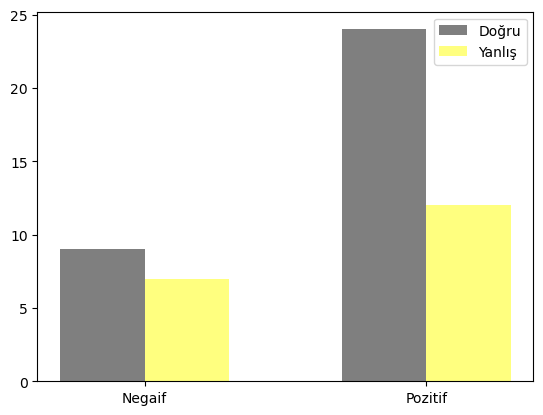

Doğru bilinen negatifler :9
Yanlış bilinen negatifler :7
Doğru bilinen pozitifler :24
Yanlış bilinen pozitifler :12
Başarı oranı : % 63.46153846153846

dirty sınıfı için karmaşıklık matrisi :


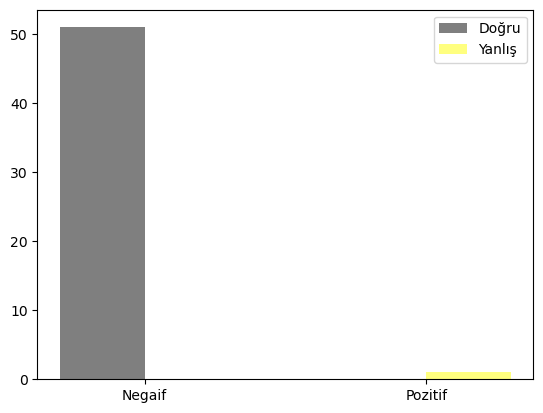

Doğru bilinen negatifler :51
Yanlış bilinen negatifler :0
Doğru bilinen pozitifler :0
Yanlış bilinen pozitifler :1
Başarı oranı : % 98.07692307692308

stain sınıfı için karmaşıklık matrisi :


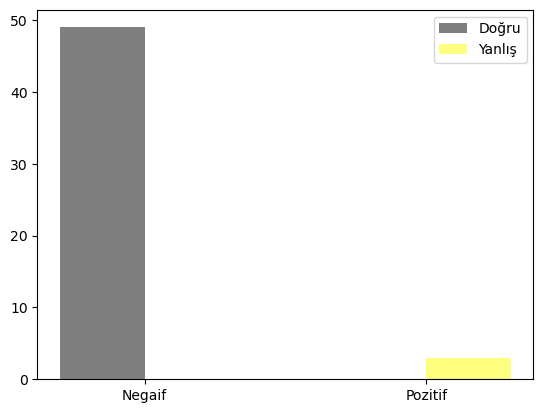

Doğru bilinen negatifler :49
Yanlış bilinen negatifler :0
Doğru bilinen pozitifler :0
Yanlış bilinen pozitifler :3
Başarı oranı : % 94.23076923076923

damage sınıfı için karmaşıklık matrisi :


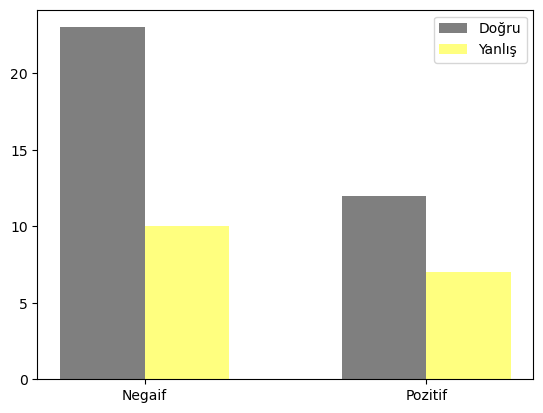

Doğru bilinen negatifler :23
Yanlış bilinen negatifler :10
Doğru bilinen pozitifler :12
Yanlış bilinen pozitifler :7
Başarı oranı : % 67.3076923076923


Total başarı oranı :%80.76923076923077


In [79]:
classes=['scratch','dirty','stain','damage']
tp=0
tn=0
fp=0
fn=0
for i,class_name in enumerate(classes):
    cf = tensorflow.math.confusion_matrix(gercek[:, i],tahmin[:, i])
    print(f'{class_name} sınıfı için karmaşıklık matrisi :')
    tp+=(int(cf[1, 1]))
    tn+=(int(cf[0, 0]))
    fp+=(int(cf[0, 1]))
    fn+=(int(cf[1, 0]))
    true_positives = [cf[0, 0], cf[1, 1]]
    false_positives = [cf[0, 1], cf[1, 0]]
    basari=100*(int(cf[0, 0])+ int(cf[1, 1]))/(int(cf[0, 0])+ int(cf[1, 1])+int(cf[0,1])+int(cf[1,0]))
    labels = ['Negaif', 'Pozitif']
    bar_width = 0.30
    plt.bar(np.arange(len(labels)), true_positives, bar_width, label='Doğru', color='black', alpha=0.5)
    plt.bar(np.arange(len(labels)) + bar_width, false_positives, bar_width, label='Yanlış', color='yellow', alpha=0.5)
    plt.xticks(np.arange(len(labels)) + bar_width / 2, labels)
    plt.legend()
    plt.show()
    print("Doğru bilinen negatifler :" + str(int(cf[0,0])) + "\n" +
          "Yanlış bilinen negatifler :" + str(int(cf[0,1])) + "\n" +
          "Doğru bilinen pozitifler :" + str(int(cf[1,1])) + "\n" +
          "Yanlış bilinen pozitifler :" + str(int(cf[1,0]))+ "\n" +
          "Başarı oranı : % "+str(basari)+ "\n")
print()
print("Total başarı oranı :%"+str(100*(tp+tn)/(tp+tn+fp+fn)))

In [86]:
classes=['scratch','dirty','stain','damage']
gercek_errors=[]
tahmin_errors=[]
for i in range(len(gercek)):
    for k in range(4):
        if gercek[i,k]==1 :
            gercek_errors.append(classes[k])
        if tahmin[i,k]==1 :
            tahmin_errors.append(classes[k])
    print(str(i+1)+'.gerçek : ',end='')
    for error in gercek_errors :
        print(error+', ', end='')
    gercek_errors=[]
    print('tahmin  : ',end='')
    for error in tahmin_errors :
        print(error+', ', end='')
    print('')
    tahmin_errors=[]

1.gerçek : scratch, tahmin  : scratch, 
2.gerçek : damage, tahmin  : damage, 
3.gerçek : damage, tahmin  : scratch, damage, 
4.gerçek : damage, tahmin  : scratch, 
5.gerçek : damage, tahmin  : scratch, damage, 
6.gerçek : scratch, tahmin  : scratch, 
7.gerçek : damage, tahmin  : damage, 
8.gerçek : scratch, damage, tahmin  : damage, 
9.gerçek : damage, tahmin  : scratch, 
10.gerçek : scratch, tahmin  : scratch, 
11.gerçek : scratch, tahmin  : scratch, 
12.gerçek : damage, tahmin  : 
13.gerçek : scratch, tahmin  : scratch, 
14.gerçek : scratch, tahmin  : scratch, 
15.gerçek : scratch, tahmin  : damage, 
16.gerçek : scratch, tahmin  : scratch, 
17.gerçek : scratch, dirty, tahmin  : scratch, 
18.gerçek : scratch, tahmin  : scratch, 
19.gerçek : scratch, damage, tahmin  : damage, 
20.gerçek : scratch, tahmin  : damage, 
21.gerçek : scratch, tahmin  : damage, 
22.gerçek : scratch, stain, tahmin  : damage, 
23.gerçek : scratch, tahmin  : scratch, 
24.gerçek : scratch, tahmin  : scratch, 
25.